In [5]:
import pandas as pd
import numpy as np


# Reading the data


In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/saurabhgupta18891/Python-ML/master/BBCtext.csv")

In [7]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


In [9]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

Using TensorFlow backend.


# Preprocessing Data

In [24]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
Numbers=re.compile('[0-9999]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text)  
    text = BAD_SYMBOLS_RE.sub('', text)
    text = Numbers.sub(' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
df['text'] = df['text'].apply(clean_text)

In [25]:
def print_plot(index):
    example = df[df.index == index][['text', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])

In [26]:
print_plot(10)

berlin cheers antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl arrested beheaded brother hans distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing antinazi leaflets summer arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses six days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize festival south afric

# LSTM Modelling

In [27]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30124 unique tokens.


In [28]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2225, 250)


In [29]:
Y = pd.get_dummies(df['category']).values #CONVERTING CATEGORICAL LABELS INTO NUMBERS
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2225, 5)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)#TRAIN-TEST SPLIT
print(X_test.shape,Y_test.shape)

(1557, 250) (1557, 5)
(668, 250) (668, 5)


In [68]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 1089 samples, validate on 468 samples
Epoch 1/10
1089/1089 [==============================] - 19s 18ms/step - loss: 1.6042 - acc: 0.2736 - val_loss: 1.5916 - val_acc: 0.3098
Epoch 2/10
1089/1089 [==============================] - 16s 14ms/step - loss: 1.5260 - acc: 0.4242 - val_loss: 1.3539 - val_acc: 0.4765
Epoch 3/10
1089/1089 [==============================] - 15s 14ms/step - loss: 1.1898 - acc: 0.5491 - val_loss: 1.1116 - val_acc: 0.5876
Epoch 4/10
1089/1089 [==============================] - 16s 14ms/step - loss: 0.8934 - acc: 0.6529 - val_loss: 0.8512 - val_acc: 0.7500
Epoch 5/10
1089/1089 [==============================] - 15s 14ms/step - loss: 0.6162 - acc: 0.7815 - val_loss: 0.6034 - val_acc: 0.8120
Epoch 6/10
1089/1089 [==============================] - 16s 14ms/step - loss: 0.3941 - acc: 0.8916 - val_loss: 0.4784 - val_acc: 0.8269
Epoch 7/10
1089/1089 [==============================] - 16s 14ms/step - loss: 0.2764 - acc: 0.9128 - val_loss: 0.4498 - val_acc: 0.8526
E

# Model Evaluation

In [71]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

668/668 [==============================] - 2s 3ms/step
Test set
  Loss: 0.451
  Accuracy: 0.841


Text(0.5, 1.0, 'Accuracy')

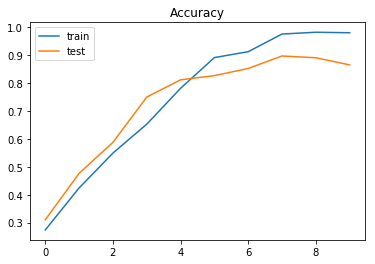

In [72]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

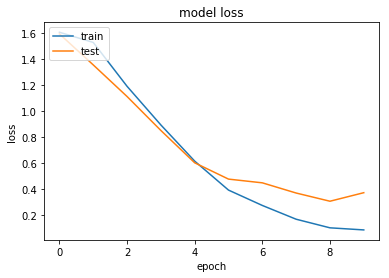

In [73]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()